# Aula 18 - Introdução ao Aprendizado Supervisionado: Regressão

Nesta aula vamos estudar o uso de algoritmos de **Aprendizado de Máquina Supervisionado**. Focaremos nos algoritmos utilizados para **regressão**, que é a tarefa de predizer valores de saída (dados numéricos) para conjuntos de dados de entrada (numéricos ou transformados em numéricos).

Existem muitos algoritmos para se realizar essa tarefa, entre eles:
- Regressão Linear 
- Redes Neurais
- Árvores de Decisão
- RandomForest
- Support Vector Regression (SVR)

Cada uma dessas técnicas tem uma forte base matemática e conceitual. Os algoritmos foram propostos ao longo de diversas décadas e possuem diferentes cenários de aplicações. Não teremos tempo de ver cada um deles a fundo, nem mesmo todos eles. Iremos nos focar nos procedimentos básicos para se utilizar esses algoritmos.

--------------------------

## Exemplo 1 - Preço de Casas

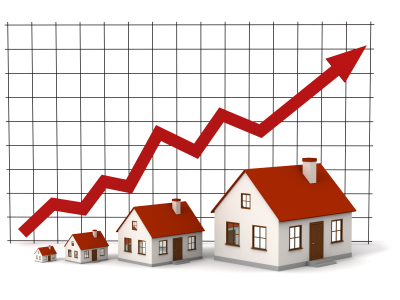

Foram medidos os preços de casas vendidas entre Maio de 2014 e Maio de 2015 em Seattle. Foram anotados 21 atributos descritivos destas casas, como número de quartos e número de banheiros, entre outros.

Os dados estão diponíveis em: https://www.openml.org/d/42731

Será que é possível usar as características das casas para predizer qual deveria ser o seu valor de venda?

### Exemplo 1 - Primeiro passo: carregar os dados

In [1]:
# Para trabalhar com dados em tabelas
import pandas as pd

# Para trabalhar com dados do OpenML
from sklearn.datasets import fetch_openml

# Para trabalhar com gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = fetch_openml(data_id=42731)

In [3]:
dados

{'data':        bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
 0           3.0       1.00       1180.0    5650.0     1.0         0.0   0.0   
 1           3.0       2.25       2570.0    7242.0     2.0         0.0   0.0   
 2           2.0       1.00        770.0   10000.0     1.0         0.0   0.0   
 3           4.0       3.00       1960.0    5000.0     1.0         0.0   0.0   
 4           3.0       2.00       1680.0    8080.0     1.0         0.0   0.0   
 ...         ...        ...          ...       ...     ...         ...   ...   
 21608       3.0       2.50       1530.0    1131.0     3.0         0.0   0.0   
 21609       4.0       2.50       2310.0    5813.0     2.0         0.0   0.0   
 21610       2.0       0.75       1020.0    1350.0     2.0         0.0   0.0   
 21611       3.0       2.50       1600.0    2388.0     2.0         0.0   0.0   
 21612       2.0       0.75       1020.0    1076.0     2.0         0.0   0.0   
 
        condition  grade  sqft

In [4]:
df_casas = pd.DataFrame(data = dados.data, columns=dados.feature_names) # Transformando em dataframe

In [5]:
df_casas['price'] = dados.target # Colocando a coluna de preços

In [6]:
df_casas.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,...,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014.0,10.0,13.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,...,1991.0,98125,47.7210,-122.319,1690.0,7639.0,2014.0,12.0,9.0,538000.0
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,...,0.0,98028,47.7379,-122.233,2720.0,8062.0,2015.0,2.0,25.0,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,...,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014.0,12.0,9.0,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,...,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015.0,2.0,18.0,510000.0


In [7]:
df_casas.info() # Observe que não temos nenhum dado faltando para as colunas de informação

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  float64 
 1   bathrooms      21613 non-null  float64 
 2   sqft_living    21613 non-null  float64 
 3   sqft_lot       21613 non-null  float64 
 4   floors         21613 non-null  float64 
 5   waterfront     21613 non-null  float64 
 6   view           21613 non-null  float64 
 7   condition      21613 non-null  float64 
 8   grade          21613 non-null  float64 
 9   sqft_above     21613 non-null  float64 
 10  sqft_basement  21613 non-null  float64 
 11  yr_built       21613 non-null  float64 
 12  yr_renovated   21613 non-null  float64 
 13  zipcode        21613 non-null  category
 14  lat            21613 non-null  float64 
 15  long           21613 non-null  float64 
 16  sqft_living15  21613 non-null  float64 
 17  sqft_lot15     21613 non-null  

<AxesSubplot:>

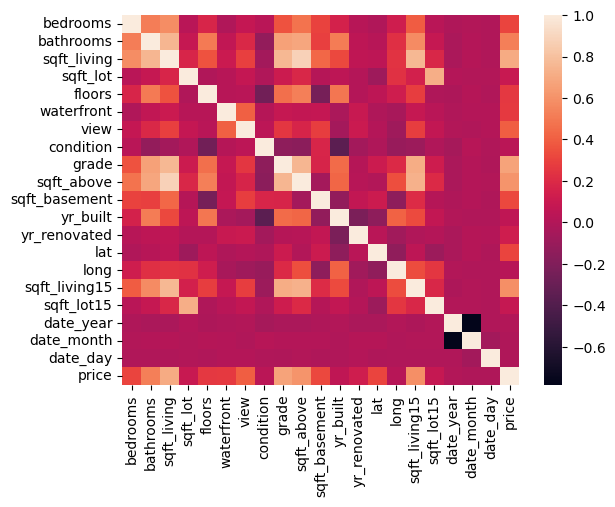

In [8]:
sns.heatmap(df_casas.corr())

### Exemplo 1 - Segundo passo: separar os dados

Precisamos ter claro em nossas mentes quais são os atributos (colunas) preditivas, isto é, aquelas que usaremos para predizer um atributo alvo (coluna alvo).

Quando se trabalhar com Aprendizado de Máquina Supervisionado, além disso precisamos separar nossos dados em dois conjuntos: um **conjunto de treinamento** e um **conjunto de teste**. Fazemos isso para evitar overfitting do algoritmo.

Existem várias estratégias para se separar dados. Vamos aplicar as principais:

(a) Escolher o tamanho dos conjuntos - 80% para treinamento e 20% para teste;

(b) Selecionar aleatoriamente os dados que irão compor o conjunto de treinamento e teste (usando um seed para garantir reprodutibilidade);

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
len(df_casas)

21613

In [11]:
# Escolhendo as colunas preditivas e alvo
x = df_casas.drop(columns=['zipcode', 'price', 'date_year', 'date_month', 'date_day'])
y = df_casas['price']                

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
len(x_train), len(x_test), len(y_train), len(y_test)

(17290, 4323, 17290, 4323)

### Exemplo 1 - Terceiro passo: escalonar os dados

In [13]:
# vamos pular essa etapa

### Exemplo 1 - Quarto passo: treinar o algoritmo 

Vamos usar o conjunto de treinamento para treinar o algoritmo escolhido.

Existem vários algoritmos possíveis. Cada algoritmo tem seus **hiperparâmetros** (parâmetros que devem ser escolhidos para melhorar a performance do algoritmo). Para entender os hiperparâmetros de cada algoritmo é necessário entender a fundo como aquele algoritmo funciona.

Aqui vamos usar um dos algoritmos mais simples existentes, a Regressão Linear:

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()  # Criamos o objeto do regressor (não mudamos nenhum hiperpârametro)

lr.fit(x_train,y_train) # Treinamos o regressor passando apenas o conjunto de dados de treinamento 

LinearRegression()

### Exemplo 1 - Quinto passo: testar e avaliar 

Usando agora o conjunto de teste, iremos testar o classificador criado e treinando no passo anterior.

Uma vez que realizamos um teste, precisamos avaliar o desempenho do nosso método. Diferentes hiperparâmetros e diferentes algoritmos podem ter um desempenho diferente. Apesar de sempre buscarmos o melhor desempenho, devemos levar em consideração outros aspectos para decidir o que é um desempenho aceitável. A primeira coisa a definir são as métricas de desempenho que podem ser comparadas entre diferentes algoritmos. 

Existem várias métricas para se medir o desempenho de um regressor: métricas de performance, métricas de tempo consumido, métricas de memória consumida, etc. Vamos calcular algumas delas:
- MAE
- MSE
- Correlação de Pearson
- $R^2$

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [17]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_predicoes = lr.predict(x_test) 

In [18]:
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MAE:  128157.3204618384


In [19]:
MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

MSE:  45998562877.06368
raiz MSE:  214472.75555898395


A **MAE** e a **MSE** são formas bem simples de avaliar o erro. O problema é como saber se um determinado valor de MAE ou MSE é muito grande? Intuitivamente sabemos que quanto maior esse valor, pior. Entretanto, o valor calculado se refere a escala dos dados, e por isso, pode ser de dificil avaliação. Em geral, devemos comparar duas MAEs ou duas MSEs para dois modelos de regressão diferentes, usando os mesmos dados. Aqueles que tiverem uma MAE ou MSE menores, serão, portanto, melhores.

Neste exemplo, uma MAE de 128157 significa que em média, estamos errando o reço de caça em $128 mil para mais ou para menos.


A escala **R²**, por outro lado, não tem esse problema de comparação. Esse valor já está em uma escala, de forma que sabemos que quanto mais próximo de 1, melhor! Mas atenção, dificilmente um modelo terá R²=1. Então se você obter isso, provavelmente seu modelo está sofrendo de overfitting (ele é muito bom para seus dados, mas não será tão bom para novas entradas). Sempre que você obtiver um valor de R²=1, verifique se não cometeu nenhum erro nos passos anteriores.

In [20]:
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

R2:  0.6957298370207318


O **coeficiente de correlação de Pearson $\rho$** também é mais fácil de interepretar o resultado já que eles está em uma escala de -1 a 1. Quando estamos avaliando o desempenho do modelo, queremos $\rho=1$. 

In [21]:
rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor (OBS: apneas neste caso de utilização)

ρ: 0.8343415181688498


### Exemplo 1 - O modelo obtido

Nos modelos de Regressão Linear, temos uma função linear de múltiplos coeficientes. Essa função é exatamente o modelo encontrado pelo algoritmo. Para obter os coeficientes, basta fazer:

In [22]:
a_modelo = lr.coef_      # Coeficientes angulares do modelo (cada um mede a influência de cada coluna)
b_modelo = lr.intercept_ # Coeficiente linear do model

In [23]:
print(a_modelo, b_modelo)

[-3.28089883e+04  4.55327150e+04  1.07507563e+02  8.46757999e-02
  1.47880164e+03  5.68137383e+05  5.04991846e+04  2.87862784e+04
  9.57023626e+04  7.00561445e+01  3.74514181e+01 -2.53197387e+03
  2.20667659e+01  5.56748027e+05 -1.01603032e+05  2.66806211e+01
 -3.30561089e-01] -34612911.36474676


Durante a etapa de treinamento, métricas de desempenho também são calculadas com o objetivo de se minimizar o erro. Perceba que o R² de treinamento e de teste são diferentes, o que é esperado e desejado. Podemos obter o R² de treinamento, fazendo:

In [24]:
R2_treinamento = lr.score(x_train, y_train)
print(R2_treinamento)

0.6951038946870625


Se o R² de treinamento der muito próximo e 1 e o R² de teste der muito abaixo (0.7, por exemplo), então o modelo está com overfitting.

In [25]:
y_pred_linear = y_predicoes # Salvando as informações do Modelo Reg Linear para comparar depois

### Voltando no passo 4 e trocando o algoritmo para uma Rede Neural Perceptron Multicamada

Redes Neurais Artificiais como o MLP (Multilayer Perceptron) podem ser altamente sensiveis a escala dos dados (assim como as SVM e o KNN).

Vamos primeiro realizar o passo 3 de transformação dos dados: 

In [26]:
from sklearn.preprocessing import StandardScaler # Importando o Escalonador de Normalização

In [27]:
# 3 - Escalonamento
scaler = StandardScaler() # Criando o objeto de escalonamento
scaler.fit(x_train) # Passando os dados de treinamento para encontrar a escala

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

Agora vamos criar a rede neural e treinar ela:

In [28]:
from sklearn.neural_network import MLPRegressor # Importando a Rede Neural MLP para Regressão

In [29]:
# 4 - Treino
# Instanciando o objeto
ml_perceptron = MLPRegressor(solver='lbfgs', # otimizador por métodos quasi-Newton
                             tol=1e-5, # Limiar para a otimização (treinamento)
                             max_iter=1500, # Limite de iterações durante a otimização (treinamento)
                             random_state=42, # (seed) pesos da rede são inicializados aleatoriamente
                             hidden_layer_sizes=(10,4), # Quantidade de neuronios por camada oculta #(12,7,3)
                             activation='relu') # Função de ativação dos neuronios

ml_perceptron.fit(x_train_escalonado, y_train)  # Treinando (perceba que estamos passando o x_train escalonado)

D:\arthu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(10, 4), max_iter=1500, random_state=42,
             solver='lbfgs', tol=1e-05)

In [30]:
# 5 - Teste
y_predicoes = ml_perceptron.predict(x_test_escalonado) # Perceba que estamos passando o x_test escalonado

R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor (OBS: apneas neste caso de utilização)

MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)

R2:  0.8515392391391379
ρ: 0.9241413630634854
MAE:  81179.03593482164
MSE:  22443809726.096542


In [31]:
y_predicoes_mlp = y_predicoes

#### Gráfico de acerto

Podemos visualizar nossos acertos através de um gráfico de dispersão entre y_test e y_pred. Perceba que se nosso modelo acerta tudo, y_test=y_pred. Dessa forma, teriamos uma reta perfeita com ângulo de inclinação de 45°. Entretanto, se nosso modelo não acertar tudo, então teremos uma outra reta, com outro ângulo de inclinação.

In [32]:
import seaborn as sns

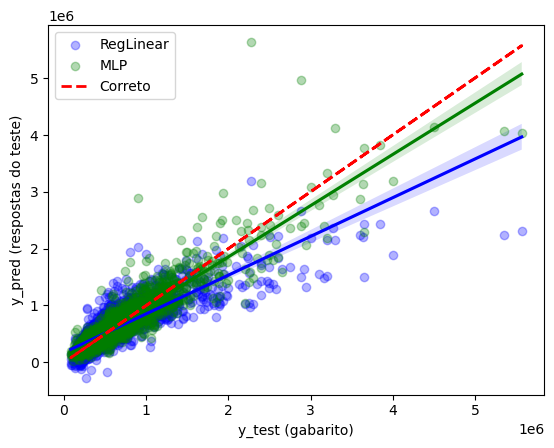

In [33]:
ax = sns.regplot(x=y_test,y=y_pred_linear,
                 color="b", scatter_kws={'alpha':0.3}, label='RegLinear') # Regressão Linear
ax = sns.regplot(x=y_test,y=y_predicoes_mlp,
                 color="g", scatter_kws={'alpha':0.3}, label='MLP') # Rede Neural
ax.plot(y_test, y_test, 'r--', linewidth = 2, label='Correto') # Reta 100% correto
ax.set(xlabel='y_test (gabarito)', ylabel='y_pred (respostas do teste)') 
ax.legend()
#ax.set_xscale('log'), ax.set_yscale('log')

E se tivessemos escalonado os dados para passar pela Regressão Linear? Qual seria o resultado?